In [99]:
import tensorflow as tf
import keras 
import matplotlib
import numpy

In [100]:
import os

In [101]:
path = "C:\\Users\\USER\\Documents\\datasets\\Face Dataset"

In [102]:
classes = os.listdir(path)

In [103]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = path,
    batch_size = 16,
    validation_split = 0.2,
    subset = "training",
    seed = 123
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory = path,
    batch_size = 16,
    validation_split = 0.2,
    subset = "validation",
    seed = 123
)

Found 2062 files belonging to 5 classes.
Using 1650 files for training.
Found 2062 files belonging to 5 classes.
Using 412 files for validation.


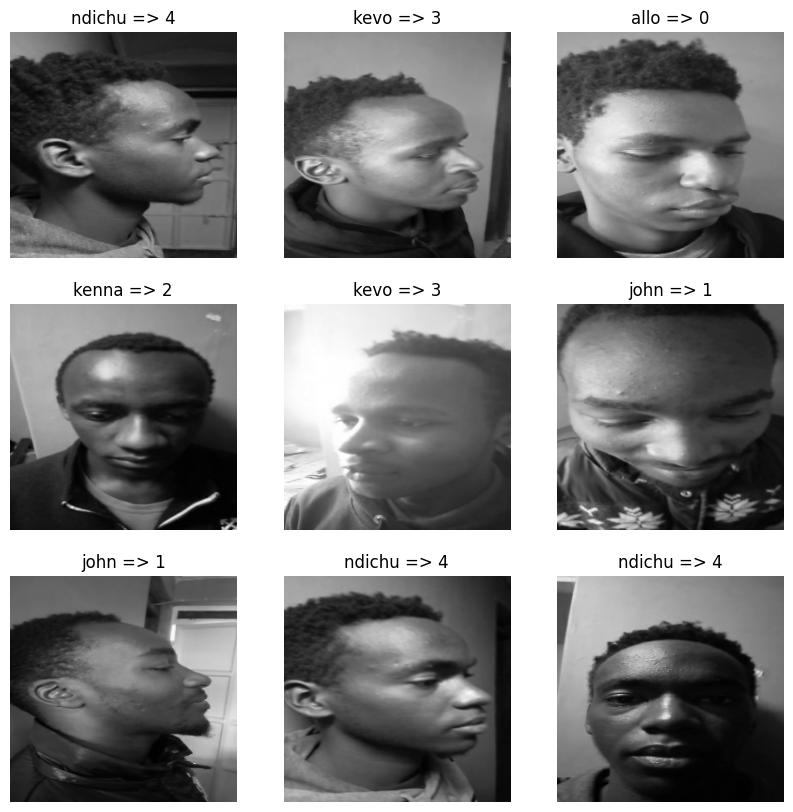

In [104]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"{classes[labels[i]]} => {labels[i]}")
    plt.axis("off")

In [105]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 256, 256, 3)
(16,)


In [106]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [107]:
from keras import layers

In [108]:
#normalization_layer = layers.Rescaling(1. / 255)

In [109]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [110]:
#normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

#image_batch, labels_batch = next(iter(normalized_ds))
#first_image = image_batch[0]
for image_batch, labels_batch in train_ds:
    image_batch = image_batch / 255.0

In [111]:
import numpy as np

In [112]:
first_image = image_batch[0]
np.max(first_image)

1.0

In [113]:
num_classes = len(class_names)

model = keras.models.Sequential()

In [114]:
#model.add(layers.Rescaling(1. / 255, input_shape = (256, 256, 3)))

In [115]:
#model.add(layers.Input(input_shape = (256, 256, 3)))
model.add(layers.Conv2D(16, 3, padding = "same", activation = "relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding = "same", activation = "relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(62, 3, padding = "same", activation = "relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dense(num_classes))

In [125]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

In [126]:
len(train_ds.take(5))

5

In [133]:
history = model.fit(train_ds, epochs = 5, batch_size = 32, verbose = True)

"""
epochs = 5
for image_batch, labels_batch in train_ds:
    image_batch = image_batch/255.0
    history = model.fit(image_batch, labels_batch, epochs = epochs, batch_size = 16, verbose = True)

"""

Epoch 1/5
104/104 [==============================] - 79s 760ms/step - loss: 1.6159e-05 - accuracy: 1.0000
Epoch 2/5
104/104 [==============================] - 74s 708ms/step - loss: 5.0845e-06 - accuracy: 1.0000
Epoch 3/5
104/104 [==============================] - 56s 539ms/step - loss: 3.1209e-06 - accuracy: 1.0000
Epoch 4/5
104/104 [==============================] - 58s 558ms/step - loss: 2.0653e-06 - accuracy: 1.0000
Epoch 5/5
104/104 [==============================] - 57s 549ms/step - loss: 1.4712e-06 - accuracy: 1.0000


'\nepochs = 5\nfor image_batch, labels_batch in train_ds:\n    image_batch = image_batch/255.0\n    history = model.fit(image_batch, labels_batch, epochs = epochs, batch_size = 16, verbose = True)\n\n'

In [134]:
y_hat = model.predict(test_ds)

26/26 [==============================] - 6s 218ms/step


In [135]:
y_hat

array([[ 15.781416  ,  -0.4455045 ,  -8.367748  ,   0.82960325,
        -10.424003  ],
       [ -6.814863  ,  15.440061  , -10.152569  ,  -0.9488751 ,
         -2.9140632 ],
       [ -5.7137184 ,   3.8152082 ,  -5.2459745 ,  18.616112  ,
         -1.6020689 ],
       ...,
       [-14.9824    , -13.62391   ,  24.008642  ,  -3.2007618 ,
        -16.910095  ],
       [-11.157152  ,  -5.4642386 ,  11.954744  ,  -4.053746  ,
         -4.6783648 ],
       [ -9.796813  ,  -9.020703  ,  18.39116   ,   0.99203545,
         -6.625227  ]], dtype=float32)

In [ ]:
loop = len(train_ds)

plt.figure(figsize=(10, 10))
for x in range(loop):
    for images, labels in train_ds.take(x):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"{classes[labels[i]]} => {labels[i]}")
        plt.axis("off")

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(4):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(f"{classes[labels[i]]} => {labels[i]}")
    plt.axis("off")